In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datas=pd.read_csv('/content/car_age_price.csv')
datas.head(20)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [582]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [583]:
datas.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


To check if there is any null values

In [584]:
datas.isnull().sum()

Year     0
Price    0
dtype: int64

computing the correlation coefficient of price and Year:

In [585]:
datas.Year.corr(datas.Price)

0.776302138641932

In [586]:
datascorr=datas.corr()
datascorr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


We could observe from the value above, that there’s a high correlation between Price and Year and the coefficient is close to +1, it indicates a strong positive linear relationship.

<Axes: xlabel='Price', ylabel='Year'>

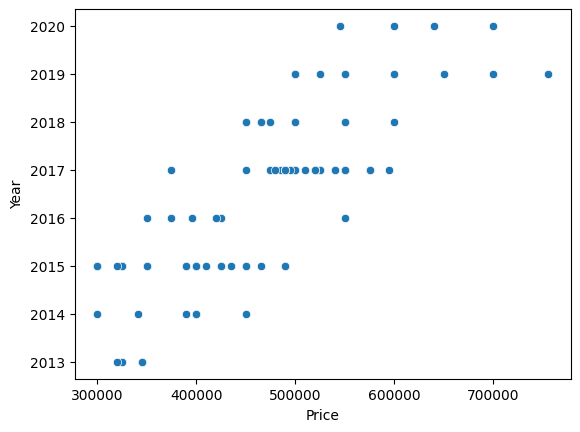

In [587]:
sns.scatterplot(datas,
                 x='Price',
                 y='Year')



<Axes: ylabel='Price'>

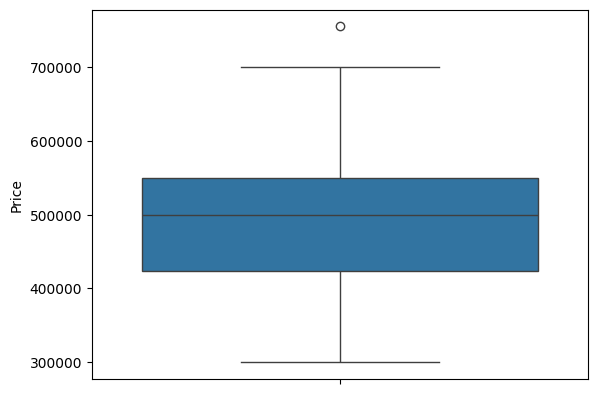

In [588]:
sns.boxplot(data=datas['Price'])

<Axes: xlabel='Price', ylabel='Count'>

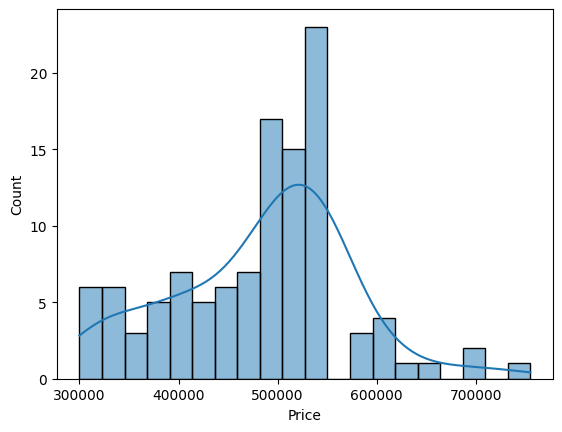

In [589]:
sns.histplot(datas['Price'],bins=20,kde=True)

In [590]:
y = datas['Price']  # dependent feature
X = datas.drop('Price', axis=1) #independent feature

In [591]:
X.shape

(112, 1)

In [592]:
y.shape #we neeed to reshape the size

(112,)

In [593]:
y=np.array(y)
y=y.reshape(-1,1)

In [594]:
y.shape

(112, 1)

Transforming the data

In [595]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

Splitting data into train and test

In [596]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)


In [597]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


Doing Linear Regreassion

In [598]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
model=lr_model.fit(X_train,y_train)#remove errors and try to fix the data
predictions=model.predict(X_test)
predictions

array([[ 1.28742151],
       [ 0.23888223],
       [ 0.76315187],
       [ 0.76315187],
       [ 0.76315187],
       [-0.80965705],
       [ 0.23888223],
       [ 0.76315187],
       [ 1.28742151],
       [ 1.28742151],
       [-1.85819633],
       [ 0.23888223],
       [-0.80965705],
       [ 1.81169115],
       [ 0.76315187],
       [ 1.28742151],
       [-1.85819633],
       [-0.80965705],
       [ 0.23888223],
       [ 0.23888223],
       [ 0.23888223],
       [ 0.23888223],
       [ 0.23888223]])

Linear Regression prediction

In [599]:
new_car = [[2022]]
prediction=lr_model.predict(new_car)
print("Predicted price of a 2022 model (Linear Regression):", prediction[0])
print(predictions.shape)

Predicted price of a 2022 model (Linear Regression): [1719.84803972]
(23, 1)


Linear regression Error

In [600]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Mean Squared error is:\n',mean_squared_error(y_test,predictions))
print('Mean absolute error is:\n',mean_absolute_error(y_test,predictions))
print('R2 score is:\n',r2_score(y_test,predictions))

Mean Squared error is:
 0.52470677333406
Mean absolute error is:
 0.5895295935049284
R2 score is:
 0.3675931342589792


Doing with Lasso Regression

In [601]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)
predictions2=lasso_model.predict(X_test)
predictions2

array([ 1.27111638,  0.23595182,  0.7535341 ,  0.7535341 ,  0.7535341 ,
       -0.79921275,  0.23595182,  0.7535341 ,  1.27111638,  1.27111638,
       -1.83437731,  0.23595182, -0.79921275,  1.78869866,  0.7535341 ,
        1.27111638, -1.83437731, -0.79921275,  0.23595182,  0.23595182,
        0.23595182,  0.23595182,  0.23595182])

Prediction using Lasso

In [602]:
prediction=lasso_model.predict(new_car)
prediction

array([1697.91051069])

Error for lasso regression

In [603]:
print('Mean Squared error is:\n',mean_squared_error(y_test,predictions2))
print('Mean absolute error is:\n',mean_absolute_error(y_test,predictions2))
print('R2 score is:\n',r2_score(y_test,predictions2))

Mean Squared error is:
 0.516557776148543
Mean absolute error is:
 0.5822411233629576
R2 score is:
 0.3774147756612414


Comparing these metrics, we can say that the Lasso Regression model performs slightly better than the Linear Regression model. This conclusion is drawn based on the lower MSE and MAE values, as well as the slightly higher R2 score